In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FRAME_SIZE = 256
HOP_LENGTH = 64 ## o tanto que salta para a direita de um frame para o outro, frames serão sobrepostos
## diferentes frames terão amostras iguais


In [2]:
path = "drive/My Drive/TCC - Vinícius Franklin - Desenvolvimento de Prótese Ativa Controlada por Sinais EMG Utilizando Classificação com Machine Learning/Modelo - Análise/ECG"

In [ ]:
# Carrega o CSV
df = pd.read_csv(path +"/ECG_filtrado.csv")
sr = 1/(2*10**-3)

In [ ]:


fig = px.line(df[:5*FRAME_SIZE], x="tempo_s", y="ECG_filtrado",
              title="ECG Filtrado - AD8232",
              labels={"tempo_s": "Tempo (s)", "ECG_filtrado": "Amplitude"})
fig.show()


In [ ]:
len(df)/(len(df)*2*10**-3)

499.99999999999994

In [ ]:
1024/8

128.0

In [ ]:
ecg_values = df.ECG_filtrado.values

## Amplitude envelope

In [ ]:
## calculate the amplitude envelope
def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    # calculate the AE for each frame

    for i in range(0,len(signal),hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)


def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0,signal.size, hop_length)])

In [ ]:
amp_en_ecg = amplitude_envelope(ecg_values,FRAME_SIZE,HOP_LENGTH)

In [ ]:
frames = range(len(amp_en_ecg))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
amp_en_ecg

array([ 74.45622333,  74.45622333, 145.10875809, 145.10875809,
       145.10875809, 145.10875809,  82.26451545,  82.26451545,
        98.77188857, 115.78290191, 115.78290191, 115.78290191,
       115.78290191,  82.82816954,  54.13382183, 120.14028149,
       120.14028149, 120.14028149, 120.14028149,  88.08681127,
        75.55312022, 120.60719812, 120.60719812, 120.60719812,
       120.60719812,  68.40140121, 109.6862062 , 109.6862062 ,
       109.6862062 , 109.6862062 ,  95.65156088,  89.23765141,
       123.547654  , 123.547654  , 123.547654  , 123.547654  ,
        94.43015165,  94.43015165,  30.65039359, 135.092634  ,
       135.092634  , 135.092634  , 135.092634  ,  86.97748912,
        71.08844553, 106.02749309, 106.02749309, 106.02749309,
       106.02749309,  86.11181149,  86.11181149, 113.55421327,
       113.55421327, 113.55421327, 113.55421327,  87.2851706 ,
        87.2851706 ,  17.35940229, 117.39162156, 117.39162156,
       117.39162156, 117.39162156,  95.15249123,  83.60

In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(amp_en_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# ECG filtrado
fig.add_trace(go.Scatter(x=np.arange(len(ecg_values))/sr, y=ecg_values,
                         mode='lines', name='ECG', line=dict(color='blue'), opacity=0.5))

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=amp_en_ecg,
                         mode='lines', name='Envelope', line=dict(color='red', width=2)))

fig.show()

## RMS

In [ ]:
rms_ecg = librosa.feature.rms(y=ecg_values, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(amp_en_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# ECG filtrado
fig.add_trace(go.Scatter(x=np.arange(len(ecg_values))/sr, y=ecg_values,
                         mode='lines', name='ECG', line=dict(color='blue'), opacity=0.5))

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=rms_ecg,
                         mode='lines', name='RMS', line=dict(color='red', width=2)))

fig.show()

In [ ]:
### rms energy, my code

def rms_calculator(data):
    soma = 0
    for sample in data:
        soma += sample**2
    return (soma/len(data))**0.5

def frame_2_rms(data,frame_size,hop_lenght):
    lista_rms = []
    for i in range(0,len(data) - frame_size + 1,hop_lenght):
        frame = data[i:i + frame_size]
        rms_value = rms_calculator(data=frame)
        lista_rms.append(rms_value)
    return np.array(lista_rms)


In [ ]:
rms_calc_ecg = frame_2_rms(ecg_values,FRAME_SIZE,HOP_LENGTH)

In [ ]:
rms_calc_ecg

array([32.06836318, 26.24219825, 39.23199504, 41.78072724, 48.21916674,
       50.40085438, 39.10951416, 36.4330875 , 28.2216853 , 41.42811371,
       46.44468637, 48.13080839, 48.07851003, 35.0273447 , 24.4288024 ,
       42.45724878, 49.04808609, 50.76666562, 51.5760246 , 35.92180692,
       25.87535185, 42.76628121, 47.96735759, 47.98354271, 47.52633049,
       30.54536441, 25.88493492, 40.98526981, 47.96678955, 48.33768105,
       45.36160557, 31.10177325, 30.70545117, 42.47860603, 50.83209475,
       52.46801057, 46.6984651 , 35.17240619, 21.9057783 , 42.68795071,
       49.48621207, 51.25334284, 51.7682549 , 34.41367239, 22.03624883,
       38.381013  , 41.06824968, 45.29083326, 46.53700681, 31.49258883,
       26.65390671, 36.16376055, 35.70658197, 45.29219282, 45.79094164,
       34.68222707, 33.51880724, 20.27112242, 42.56476071, 49.00812971,
       52.81837978, 53.25221845, 37.75013844, 27.9713273 , 19.55529598,
       46.32948206, 50.86130361, 55.22985398, 56.22083509, 36.70

In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(amp_en_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# ECG filtrado
fig.add_trace(go.Scatter(x=np.arange(len(ecg_values))/sr, y=ecg_values,
                         mode='lines', name='ECG', line=dict(color='blue'), opacity=0.5))

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=rms_calc_ecg,
                         mode='lines', name='RMS', line=dict(color='red', width=2)))

fig.show()

## Zero Crossing Rate

In [ ]:
ecg_values

array([ 4.84608336e-04,  6.35638680e-03,  4.01643384e-02, ...,
       -2.57459296e+01, -2.34312826e+01, -2.11962911e+01])

In [ ]:
zc_ecg = librosa.feature.zero_crossing_rate(y=ecg_values, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(amp_en_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# ECG filtrado
fig.add_trace(go.Scatter(x=np.arange(len(ecg_values))/sr, y=ecg_values,
                         mode='lines', name='ECG', line=dict(color='blue'), opacity=0.5))

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=zc_ecg*FRAME_SIZE,
                         mode='lines', name='ZC', line=dict(color='red', width=2)))

fig.show()

In [ ]:
### implementing zero-crossing rate


def zero_cs_sum(data):
    soma = 0
    for n in range(0,len(data)-1):
        value = 0.5*(np.abs(np.sign(data[n])-np.sign(data[n+1])))
        soma += value
    return soma

def zcr_calculator(data,frame_size,hop_lenght):
    lista_zc = []
    for i in range(0,len(data) - frame_size + 1,hop_lenght):
        frame = data[i:i + frame_size]
        zc_value = zero_cs_sum(data=frame)
        lista_zc.append(zc_value)
    return np.array(lista_zc)


In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear", vmin=None, vmax=None):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis,
                             vmin=vmin,
                             vmax=vmax,cmap="inferno")  # <- controla o range de cores
    plt.colorbar(format="%+2.f")


In [ ]:
Y_ecg.min()

-2.5183364351962894

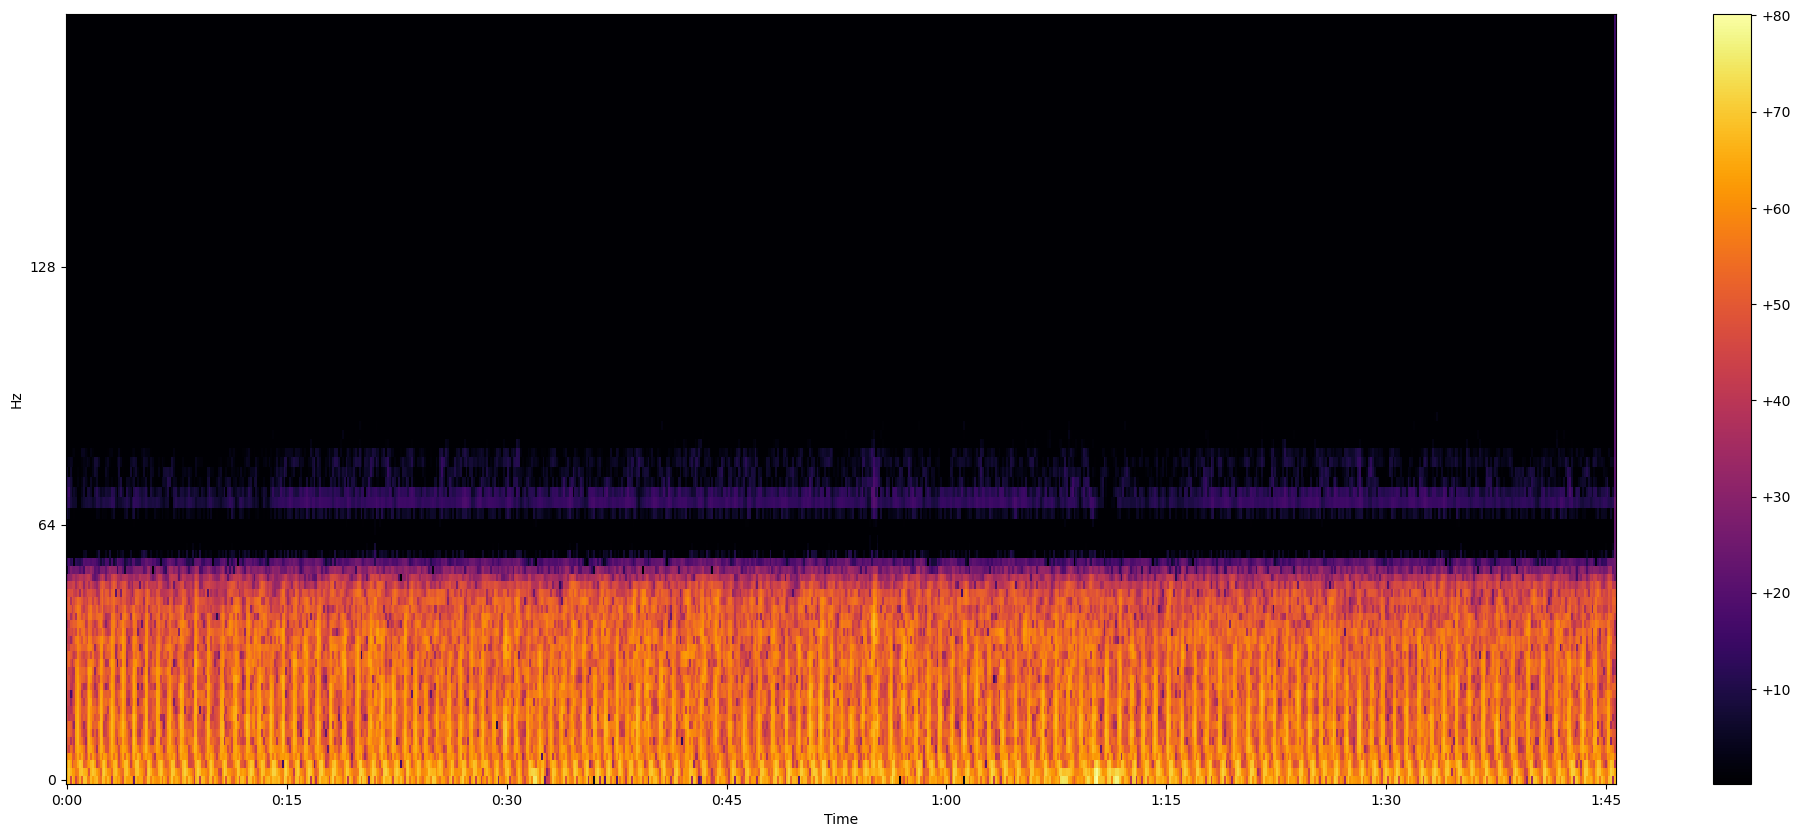

In [ ]:
S_ecg = librosa.stft(ecg_values, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
Y_ecg = librosa.power_to_db(np.abs(S_ecg) ** 2)

vmin = Y_ecg.min()
vmax = Y_ecg.max()

plot_spectrogram(Y_ecg, sr, HOP_LENGTH, y_axis="log", vmin=vmin, vmax=vmax)

In [ ]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    # FFT
    X = np.fft.fft(signal)
    X_mag = np.abs(X)

    # Frequência
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag) * f_ratio)




    # Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=f[:f_bins//2],
        y=X_mag[:f_bins//2],
        mode='lines',
        name='Magnitude'
    ))

    fig.update_layout(
        title=title,
        xaxis_title='Frequency (Hz)',
        yaxis_title='Magnitude',
        width=900,
        height=400
    )

    fig.show()
    # retornar so a parte positiva, ja que é simetrico
    return X_mag[:f_bins//2],f,f_bins


In [ ]:
X_mag_ecg,f_ecg,f_bins_ecg = plot_magnitude_spectrum(ecg_values,sr,"ECG")

## Band Energy Ratio

In [ ]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""

    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)


def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""

    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate,spectrogram.shape[0])
    band_energy_ratio = []

    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T

    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        #print(sum_power_low_frequencies,sum_power_high_frequencies)
        epsilon = 1e-12
        band_energy_ratio_current_frame = sum_power_low_frequencies / (sum_power_high_frequencies + epsilon)

        band_energy_ratio.append(band_energy_ratio_current_frame)


    return np.array(band_energy_ratio)

In [ ]:
split_frequency = 10

ber_ecg = band_energy_ratio(S_ecg, split_frequency, sr)

In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(ber_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=ber_ecg,
                         mode='lines', name='BER', line=dict(color='red', width=2)))

fig.show()

## Spectral Centroid

In [ ]:
sc_ecg = librosa.feature.spectral_centroid(y=ecg_values, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(sc_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=sc_ecg,
                         mode='lines', name='SC', line=dict(color='red', width=2)))

fig.show()

## Bandwidth

In [ ]:
bw_ecg = librosa.feature.spectral_bandwidth(y=ecg_values, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(ban_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=ban_ecg,
                         mode='lines', name='BER', line=dict(color='red', width=2)))

fig.show()

# f0

In [ ]:
import numpy as np

def peak_frequency(signal, sr, frame_size, hop_length):
    """
    Calcula a frequência de pico e magnitude para cada frame do sinal.

    Parâmetros:
    -----------
    signal : np.array
        Sinal 1D
    sr : int
        Taxa de amostragem
    frame_size : int
        Tamanho de cada frame (em samples)
    hop_length : int
        Salto entre frames (em samples)

    Retorna:
    --------
    peak_freqs : np.array
        Frequência de pico de cada frame
    peak_mags : np.array
        Magnitude correspondente de cada frame
    """
    n_samples = len(signal)
    frames = []

    # Cria frames com overlap
    for start in range(0, n_samples - frame_size + 1, hop_length):
        frames.append(signal[start:start+frame_size])
    frames = np.array(frames)

    # Arrays de saída
    peak_freqs = np.zeros(len(frames))
    peak_mags = np.zeros(len(frames))

    # Calcula FFT para cada frame
    for i, frame in enumerate(frames):
        X = np.fft.fft(frame)
        X_mag = np.abs(X)[:frame_size // 2]  # metade positiva
        freqs = np.fft.fftfreq(frame_size, d=1/sr)[:frame_size // 2]
        idx = np.argmax(X_mag)
        peak_freqs[i] = freqs[idx]
        peak_mags[i] = X_mag[idx]

    return peak_freqs, peak_mags


In [ ]:
f0_ecg, mag_fo_ecg = peak_frequency(ecg_values,sr,FRAME_SIZE,HOP_LENGTH)

In [ ]:
# Calcula tempo de cada frame
t = np.arange(len(f0_ecg)) * HOP_LENGTH / sr

# Cria subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Envelope sobreposto
fig.add_trace(go.Scatter(x=t, y=f0_ecg,
                         mode='lines', name='f0', line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=t, y=mag_fo_ecg,
                         mode='lines', name='Mag f0', line=dict(color='red', width=2)))

fig.show()

In [ ]:
f0_ecg

array([ 1.953125,  1.953125,  0.      ,  7.8125  ,  3.90625 ,  3.90625 ,
        1.953125,  1.953125,  0.      ,  1.953125,  3.90625 ,  3.90625 ,
        1.953125,  1.953125,  0.      ,  9.765625,  3.90625 ,  3.90625 ,
        1.953125,  1.953125,  0.      ,  0.      ,  3.90625 ,  3.90625 ,
        1.953125,  1.953125,  1.953125, 15.625   ,  3.90625 ,  3.90625 ,
        1.953125,  1.953125,  5.859375, 15.625   ,  1.953125,  3.90625 ,
        1.953125,  1.953125,  0.      ,  7.8125  ,  0.      ,  1.953125,
        1.953125,  1.953125,  0.      ,  0.      ,  9.765625,  1.953125,
        1.953125,  1.953125,  3.90625 ,  0.      , 13.671875,  0.      ,
        1.953125,  1.953125,  1.953125,  0.      ,  0.      ,  3.90625 ,
        1.953125,  1.953125,  1.953125,  0.      ,  0.      , 11.71875 ,
        9.765625,  1.953125,  1.953125,  1.953125,  3.90625 ,  0.      ,
        9.765625,  9.765625,  3.90625 ,  3.90625 ,  1.953125,  0.      ,
        0.      , 11.71875 , 11.71875 ,  3.90625 , 

In [ ]:
len_min = 100000000000

features = [
    amp_en_ecg,
    rms_ecg,
    rms_calc_ecg,
    zc_ecg,
    ber_ecg,
    sc_ecg,
    bw_ecg,
    f0_ecg,
    mag_fo_ecg
]
for name, feat in zip(
    ["amp_en_ecg","rms_ecg","rms_calc_ecg","zc_ecg","ber_ecg","sc_ecg","bw_ecg","f0_ecg","mag_fo_ecg"],
    features
):
    print(f"{name}: {len(feat)}")
    if len_min > len(feat):
        len_min = len(feat)


amp_en_ecg: 826
rms_ecg: 826
rms_calc_ecg: 822
zc_ecg: 826
ber_ecg: 826
sc_ecg: 826
bw_ecg: 826
f0_ecg: 822
mag_fo_ecg: 822


In [ ]:
features = [
    amp_en_ecg,
    rms_ecg,
    rms_calc_ecg,
    zc_ecg,
    ber_ecg,
    sc_ecg,
    bw_ecg,
    f0_ecg,
    mag_fo_ecg
]

# Encontra tamanho mínimo
len_min = min(len(f) for f in features)

# Trunca todas as features
features_truncadas = [f[:len_min] for f in features]

# Junta em uma matriz de shape (num_frames, num_features)
X = np.column_stack(features_truncadas)
print(X.shape)


(822, 9)


In [ ]:
len(X_pca)

1648

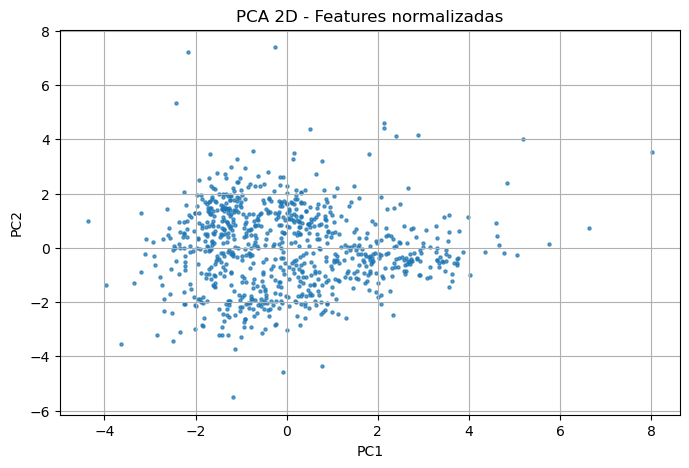

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Supondo que features_truncadas já esteja alinhada
X = np.column_stack(features_truncadas)

# Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplica PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D - Features normalizadas")
plt.grid(True)
plt.show()


In [ ]:
70*((len(df)*1/sr)/60)

123.33533333333332